Pip installing needed libraries 

In [1]:
%pip install nmrsim --quiet --exists-action i
%pip install optuna --quiet --exists-action i
%pip install comet_ml --quiet --exists-action i

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.6/499.6 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.2/532.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 53.2 MB/s eta 0:00:00


Loading needed librareis 

In [2]:
# Import the necessary libraries for logging experiments with Comet.ml
# from comet_ml import Experiment

# Import core PyTorch functionality: PyTorch base, Neural Network module, and CUDA device support
import torch
import torch.nn as nn

# Import additional Python libraries for data manipulation, file I/O, and plotting
import numpy as np
import os
import glob
from torch.utils.data import Dataset, DataLoader, TensorDataset
import pandas as pd
from torch.cuda.amp import autocast, GradScaler

# Import PyTorch classes for building a neural network model
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

# Import PyTorch optimizer classes for gradient-based optimization
from torch.optim import Adam, SGD, Adagrad, RMSprop, SparseAdam, LBFGS, Adadelta

# Import utility from scikit-learn for splitting data into train and validation sets
from sklearn.model_selection import train_test_split

# Import additional Python libraries for mathematical operations and plotting
import math
import matplotlib.pyplot
import time

# Import PyTorch Functional API for activation functions and other operations
import torch.nn.functional as F

# Import nmrsim library for NMR simulation
import nmrsim
from nmrsim import plt
from nmrsim import Multiplet

# Import random functions for generating random numbers
from random import randint, uniform

# Import itertools for generating Cartesian products of input iterables
from itertools import product

# Import Google Colab Drive library to access files stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import Optuna library for hyperparameter optimization
import optuna

# Import PyTorch optim module for optimization algorithms
import torch.optim as optim

# Set the device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

# For input & output files
import io

# Ipywidgets for interactive components
from ipywidgets import FileUpload
from IPython.display import display

Mounted at /content/drive
Using cuda device


### Upload Files

In [ ]:
print('Please upload your file.')
upload = FileUpload(accept='.csv', multiple=False)
display(upload)

FileUpload(value={}, accept='.csv', description='Upload')

In [ ]:
# print(upload.keys)

['_counter', '_dom_classes', '_model_module', '_model_module_version', '_model_name', '_view_count', '_view_module', '_view_module_version', '_view_name', 'accept', 'button_style', 'data', 'description', 'description_tooltip', 'disabled', 'error', 'icon', 'layout', 'metadata', 'multiple', 'style']


In [ ]:
# type(upload)

ipywidgets.widgets.widget_upload.FileUpload

In [ ]:
import codecs
uploaded_file = list(upload.value.values())[0]

In [ ]:
# convert the memory view into a bytes and utf-8 decode it to a string
content = str(bytes(list(upload.value.values())[0]['content']), encoding='utf-8')

In [ ]:
df = pd.read_csv(io.StringIO(content))

In [ ]:
print('Check your uploaded file heads.')
df.head()

,Unnamed: 0,SMILES_str,mass,pce,voc,jsc,e_gap_alpha
0,1891143,[SiH2]1C(=Cc2c1c1sc3ccc4cocc4c3c1c1cocc21)c1cncs1,401.5409,5.692461,0.564606,155.168132,1.655512
1,357345,c1cc2csc(-c3cc4c5nsnc5c5cc6ccc7nsnc7c6cc5c4[nH...,454.5610,5.559317,0.598550,142.944839,1.719589
2,483921,[SiH2]1C(=Cc2[nH]c3c([se]c4ccc5c[nH]cc5c34)c12...,396.4069,1.877185,0.241488,119.635360,1.846259
3,1363512,C1C=c2ccc3oc4c(cnc5cc(oc45)-c4cccc5cocc45)c3c2=C1,363.3707,3.451418,0.568578,93.423325,2.011100
4,1012138,c1cc2[se]c3c(c4cocc4c4cc(-c5ccccn5)c5nsnc5c34)...,509.3081,7.257530,0.814441,137.144048,1.748722


### Generating new Data

In [ ]:
# Change these variables to change resolutions of spectra generate
# Notation is typically: res_1=higher and res_2=lower (integer input)
res_1=400
res_2=60
# Function to generate NMR signals based on input argument of spectrometer freq
def NMR_Signal_Generator(spectrometer_frequencies):
    '''
    Takes input of list of 2 spectrometer frequencies in list format and
    generates a list of NMR signals using nmrsim library. An NMR signal given
    by this function is described by 1-4 (random), a 2Hz linewidth, a chemical
    shift from 0.5 to 9, a J coupling of 3 to 15Hz, a multiplicity of 0 to 5
    
    Parameters
    ----------
        spectrometer_frequencies: List
            List of 2 spectrometer frequencies
            
    Output
    -------
        signals_list: List
            List of NMR signals of the two resolutions
    
    
    '''
    # Assigning number of protons defined by peak integral
    integral = randint(1,4)
    #Assigning the linewidth of an NMR peak in the spectrum
    linewidth_hz = 2
    # Randomly return a floating point chemical shift assignment
    chemical_shift = uniform(0.5,9)
    # Randomly return a floating point coupling (J coupling) frequency
    coupling = uniform(3,15)
    # Randomly select a multiplicity (peak splitting)
    multiplicity = randint(0,5)
    # Generate a list of NMR signals using the Multiplet function of nmrsim
    signals_list = [(Multiplet(chemical_shift * frequency, integral, 
                               [(coupling,multiplicity)], linewidth_hz)) for 
                                frequency in spectrometer_frequencies]
    return signals_list
def create_random_spectra(num_peaks, res_1, res_2):
    '''
    Creates random NMR spectra given number of peaks desired, resolution 1
    and resolution 2
    
    Parameters
    -----------
        num_peaks: int
            Number of peaks in random spectrum
        res_1: int
            First desired resolution in MHz
        res_2: int
            Second desired resolution in MHz
    
    Output
    -------
        x_res_1: float
            Chemical shift in ppm of spectrum 1
        y_res_1: float
            Intensity of spectrum 1
        x_res_2: float
            Chemical shift in ppm of spectrum 2
        y_res_2: float
            Intensity of spectrum
    

    '''
    # Assigns desired NMR frequencies to a list
    spectrometer_frequencies = [res_1,res_2]
    # Creates blank dataframe with desired NMR frequencies column
    spectral_data = pd.DataFrame(columns=[f'{str(res_1)}MHz', f'{str(res_2)}MHz'])
    
    # Generates NMR Signals from NMRSIM using established list, generates
    # spectra and puts them in spectral_data frame
    for i in range(0,num_peaks):
        signals_list = NMR_Signal_Generator(spectrometer_frequencies)
        spectral_data.loc[len(spectral_data)] = signals_list

    # Defines spectrum object, from Multiplet class
    # Multiplets taken from spectral_data frequency df
    spectrum_res_1 = Multiplet(0,0.5,[],2) 
    for multiplet in spectral_data[f'{str(res_1)}MHz']:
        spectrum_res_1 += multiplet
        
    # Process repeated for other frequency
    spectrum_res_2 = Multiplet(0,0.5,[],2)
    for multiplet in spectral_data[f'{str(res_2)}MHz']:
        spectrum_res_2 += multiplet
    
    # Normalize the spectrometer frequencies and have n number of points on plots
    spectrum_res_1.vmin = -0.5 * spectrometer_frequencies[0]
    spectrum_res_1.vmax = 10.5 * spectrometer_frequencies[0]
    x_res_1, y_res_1 = spectrum_res_1.lineshape(points=5500)

    spectrum_res_2.vmin = -0.5 * spectrometer_frequencies[1]
    spectrum_res_2.vmax = 10.5 * spectrometer_frequencies[1]
    x_res_2, y_res_2 = spectrum_res_2.lineshape(points=5500)

    return x_res_1, y_res_1, x_res_2, y_res_2


def write_nmr_spectra(index, num_peaks, x_res_1, y_res_1, x_res_2, y_res_2, res_1, res_2):
    '''
    Writes generated NMR spectra to csv files
    
    Parameters
    -----------
        index: int
            Label as integer of NMR spectrum generated in a series
        num_peaks: int
            Specifies how many peaks are desired in spectrum
        x_res_1: float
            Output of write spectrum, chemical shift of spectrum 1
        x_res_2: float
            Output of write spectrum, chemical shift of spectrum 2
        y_res_1: float
            Output of write spectrum, intensity of spectrum 1
        y_res_2: float
            Output of write spectrum, intensity of spectrum 2
        res_1: int
            Resolution in MHz of spectrum 1
        res_2: int
            Resolution in MHz of spectrum 2
    
    Output
    -------
        filename: csv
            A csv containing the x, y data of spectra 1 and 2
    
    
    '''
    # Saving data to file
    sf = [res_1,res_2]
    x_ppm_res_1 = x_res_1/sf[0]
    x_ppm_res_2 = x_res_2/sf[1]
    spectral_data = pd.DataFrame(columns=[f'{str(res_1)}MHz_ppm',
                                        f'{str(res_1)}MHz_intensity', 
                                        f'{str(res_2)}MHz_ppm',
                                        f'{str(res_2)}MHz_intensity'])
    spectral_data[f'{str(res_1)}MHz_ppm'] = x_ppm_res_1
    spectral_data[f'{str(res_1)}MHz_intensity'] = y_res_1
    spectral_data[f'{str(res_2)}MHz_ppm'] = x_ppm_res_2
    spectral_data[f'{str(res_2)}MHz_intensity'] = y_res_2
    filename=f"/content/drive/My Drive/spectral_data/{str(res_1)}MHz/"+"spectral_data"+ "_"+str(num_peaks).zfill(2)+ "_" +str(index).zfill(5)+".csv"
    print(filename)
    spectral_data.to_csv(filename)

import time
# num_peaks = Number of Peaks that you want in your spectra
# j = how many spectra do you want.
x = time.time()

for j in range (0,5000):
    num_peaks = randint(5,16)
    #print(num_peaks)
    x_res_1, y_res_1, x_res_2, y_res_2 = create_random_spectra(num_peaks, res_1, res_2)
    write_nmr_spectra(j, num_peaks, x_res_1, y_res_1, x_res_2, y_res_2, res_1, res_2)

print(f'Time Elapsed: {round(time.time()-x, 5)} seconds') 

## Checking number of data files avaiable and Loading data 

In [3]:
#Checking how many files are in repository for training, testing, and validation
files = glob.glob('/content/drive/My Drive/spectral_data/400MHz/spectral_data_*.csv')
print('Total number of files: ', len(files))


Total number of files:  1000


In [4]:
class GHzData(Dataset):
    def __init__(self):
        # Load the list of CSV file paths.
        self.files = glob.glob(os.path.join('/content/drive/My Drive/spectral_data/400MHz/spectral_data_*.csv'))

        self.y_60 = []  # List to store 60 MHz data.
        self.y_400 = []  # List to store 400 MHz data.

        # Loop through each file in the list of files.
        for self.file in self.files:
            # Read each file into a pandas DataFrame.
            self.df = pd.read_csv(self.file)

            # Extract 60 MHz and 400 MHz intensity columns and convert them to numpy arrays.
            self.array_60 = self.df['60MHz_intensity'].to_numpy()
            self.array_400 = self.df['400MHz_intensity'].to_numpy()

            # Append the arrays to the respective lists for 60 MHz and 400 MHz data.
            self.y_60.append(self.array_60)
            self.y_400.append(self.array_400)

        # Convert the 60 MHz list to a tensor, change dtype to float, and add a dimension (n, 1, 5500).
        self.tensor_60 = torch.Tensor(self.y_60).float().unsqueeze(1).to(device)

        # Convert the 400 MHz list to a tensor, change dtype to float, and add a dimension (n, 1, 5500).
        self.tensor_400 = torch.Tensor(self.y_400).float().unsqueeze(1).to(device)

        # Store the number of samples in the dataset.
        self.num_samples = len(self.y_60)

    def __getitem__(self, index):  # Method to retrieve an item from the dataset using an index.
        return self.tensor_60[index], self.tensor_400[index]

    def __len__(self):  # Method to return the total number of samples in the dataset.
        return self.num_samples


In [5]:
# Establishing and loading data into notebook
dataset = GHzData()

#Splitting the data
train_X, test_X, train_y, test_y = train_test_split(dataset.tensor_60, dataset.tensor_400,
                                                    test_size=0.1)

# Splits train data into validation data
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y,
                                                      test_size=0.1)
# Creating datasets
train_dataset = TensorDataset(train_X, train_y)
test_dataset = TensorDataset(test_X, test_y)
valid_dataset = TensorDataset(valid_X, valid_y)

# Batch size change to higher batch sizes
train_dataloader = DataLoader(train_dataset, batch_size=192, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=192, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=192, shuffle=True)

<ipython-input-4-a83500c06f74>:23: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  self.tensor_60 = torch.Tensor(self.y_60).float().unsqueeze(1).to(device)


### CNN Module, fit(Training) and validation functions

In [6]:
class CNN(nn.Module):
    def __init__(self, num_layers, num_channels, kernel_size, drop_out):
        super().__init__()
        prev_dim = num_channels
        k = kernel_size
        layers = [nn.Conv1d(1, prev_dim, kernel_size=k, padding='same'), nn.ReLU(), nn.Dropout(p=drop_out)]

        for _ in range(1, num_layers):
            layers.append(nn.Conv1d(prev_dim, num_channels, kernel_size=k, padding='same'))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=drop_out))

        layers.append(nn.Conv1d(prev_dim, 1, kernel_size=k, padding='same'))
        self.m = nn.Sequential(*layers)

    def forward(self, x):
        return self.m(x)
 

In [7]:
def fit(model, dataloader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    scaler = GradScaler()

    for i, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device).to(next(model.parameters()).dtype), targets.to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass with gradient scaling
        scaler.scale(loss).backward()

        # Update the model weights
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()

        running_loss += loss.item()

    return running_loss / len(dataloader)


In [8]:
def validate(model, dataloader, optimizer, criterion):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, targets = batch
            inputs, targets = inputs.to(device), targets.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            epoch_loss += loss.item()
    
    return epoch_loss / len(dataloader)

### **Optimization of CNN structure**


In [11]:
def objective_structure(trial):


    # Generate the model with hyperparameters
      num_layers = trial.suggest_int('num_layers', 9, 11, step=2)
      num_channels = trial.suggest_int('num_channels', 32, 128, step=32)
      kernel_size = trial.suggest_int('kernel_size', 3, 7, step=2)
      drop_out = trial.suggest_float("drop_out", 0.0, 0.5)

      model = CNN(num_layers, num_channels, kernel_size, drop_out).to(device)
      criterion = nn.MSELoss()
      optimizer = Adam(model.parameters(), lr=0.00001)
      num_epoch = 30

    # Load Data
    # Establishing and loading data into notebook
      dataset = GHzData()

    #Splitting the data
      train_X, test_X, train_y, test_y = train_test_split(dataset.tensor_60, dataset.tensor_400,
                                                        test_size=0.1)

    # Splits train data into validation data
      train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y,
                                                          test_size=0.1)
    # Creating datasets
      train_dataset = TensorDataset(train_X, train_y)
      test_dataset = TensorDataset(test_X, test_y)
      valid_dataset = TensorDataset(valid_X, valid_y)

    # Batch size change to higher batch sizes
      train_dataloader = DataLoader(train_dataset, batch_size=192, shuffle=True)
      valid_dataloader = DataLoader(valid_dataset, batch_size=192, shuffle=True)
      test_dataloader = DataLoader(test_dataset, batch_size=192, shuffle=True)

      for epoch in range(num_epoch):
        # Training
          train_epoch_loss = fit(model, train_dataloader, optimizer, criterion)

        # Validation
          val_epoch_loss = validate(model, valid_dataloader, optimizer, criterion)

          trial.report(val_epoch_loss, epoch)

        # Handle pruning
          if trial.should_prune():
              raise optuna.exceptions.TrialPruned()


      print(f'Trial: {trial.number}, Final validation loss: {val_epoch_loss}')
      print(f'Parameters: {trial.params}')
  

      return val_epoch_loss



In [12]:
# Optimize structure
study_structure = optuna.create_study(direction="minimize")
study_structure.optimize(objective_structure, n_trials=20)
best_params = study_structure.best_params

# Get parameter importances for structure optimization
importances_structure = optuna.importance.get_param_importances(study_structure)
print("Importances (Structure): ", importances_structure)


[I 2023-06-04 20:12:43,330] A new study created in memory with name: no-name-85744d63-0bec-4acc-8ffb-0398c40fdff3
[I 2023-06-04 20:13:05,839] Trial 0 finished with value: 0.001006778096780181 and parameters: {'num_layers': 5, 'num_channels': 32, 'kernel_size': 3, 'drop_out': 0.23932820886855682}. Best is trial 0 with value: 0.001006778096780181.


Trial: 0, Final validation loss: 0.001006778096780181
Parameters: {'num_layers': 5, 'num_channels': 32, 'kernel_size': 3, 'drop_out': 0.23932820886855682}


[I 2023-06-04 20:16:20,013] Trial 1 finished with value: 0.0008962057763710618 and parameters: {'num_layers': 11, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.4360337644576616}. Best is trial 1 with value: 0.0008962057763710618.


Trial: 1, Final validation loss: 0.0008962057763710618
Parameters: {'num_layers': 11, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.4360337644576616}


[I 2023-06-04 20:16:52,003] Trial 2 finished with value: 0.001077304477803409 and parameters: {'num_layers': 7, 'num_channels': 32, 'kernel_size': 7, 'drop_out': 0.05379638894788291}. Best is trial 1 with value: 0.0008962057763710618.


Trial: 2, Final validation loss: 0.001077304477803409
Parameters: {'num_layers': 7, 'num_channels': 32, 'kernel_size': 7, 'drop_out': 0.05379638894788291}


[I 2023-06-04 20:17:21,080] Trial 3 finished with value: 0.0032176899258047342 and parameters: {'num_layers': 7, 'num_channels': 32, 'kernel_size': 5, 'drop_out': 0.3076038423912708}. Best is trial 1 with value: 0.0008962057763710618.


Trial: 3, Final validation loss: 0.0032176899258047342
Parameters: {'num_layers': 7, 'num_channels': 32, 'kernel_size': 5, 'drop_out': 0.3076038423912708}


[I 2023-06-04 20:20:08,131] Trial 4 finished with value: 0.0008516398374922574 and parameters: {'num_layers': 11, 'num_channels': 128, 'kernel_size': 3, 'drop_out': 0.13584812110751154}. Best is trial 4 with value: 0.0008516398374922574.


Trial: 4, Final validation loss: 0.0008516398374922574
Parameters: {'num_layers': 11, 'num_channels': 128, 'kernel_size': 3, 'drop_out': 0.13584812110751154}


[I 2023-06-04 20:22:49,520] Trial 5 finished with value: 0.000844061782117933 and parameters: {'num_layers': 9, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.2677179157767863}. Best is trial 5 with value: 0.000844061782117933.


Trial: 5, Final validation loss: 0.000844061782117933
Parameters: {'num_layers': 9, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.2677179157767863}


[I 2023-06-04 20:23:01,238] Trial 6 pruned. 
[I 2023-06-04 20:26:45,750] Trial 7 finished with value: 0.0008555878885090351 and parameters: {'num_layers': 11, 'num_channels': 128, 'kernel_size': 5, 'drop_out': 0.45133441226262616}. Best is trial 5 with value: 0.000844061782117933.


Trial: 7, Final validation loss: 0.0008555878885090351
Parameters: {'num_layers': 11, 'num_channels': 128, 'kernel_size': 5, 'drop_out': 0.45133441226262616}


[I 2023-06-04 20:28:15,297] Trial 8 finished with value: 0.000695933063980192 and parameters: {'num_layers': 5, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.06966798242937855}. Best is trial 8 with value: 0.000695933063980192.


Trial: 8, Final validation loss: 0.000695933063980192
Parameters: {'num_layers': 5, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.06966798242937855}


[I 2023-06-04 20:30:01,656] Trial 9 finished with value: 0.0007780374144203961 and parameters: {'num_layers': 7, 'num_channels': 128, 'kernel_size': 3, 'drop_out': 0.12965937383886417}. Best is trial 8 with value: 0.000695933063980192.


Trial: 9, Final validation loss: 0.0007780374144203961
Parameters: {'num_layers': 7, 'num_channels': 128, 'kernel_size': 3, 'drop_out': 0.12965937383886417}


[I 2023-06-04 20:30:13,424] Trial 10 pruned. 
[I 2023-06-04 20:30:25,317] Trial 11 pruned. 
[I 2023-06-04 20:30:37,437] Trial 12 pruned. 
[I 2023-06-04 20:30:49,140] Trial 13 pruned. 
[I 2023-06-04 20:31:02,087] Trial 14 pruned. 
[I 2023-06-04 20:31:14,271] Trial 15 pruned. 
[I 2023-06-04 20:32:32,291] Trial 16 finished with value: 0.000785950047429651 and parameters: {'num_layers': 5, 'num_channels': 128, 'kernel_size': 3, 'drop_out': 0.1873242280149423}. Best is trial 8 with value: 0.000695933063980192.


Trial: 16, Final validation loss: 0.000785950047429651
Parameters: {'num_layers': 5, 'num_channels': 128, 'kernel_size': 3, 'drop_out': 0.1873242280149423}


[I 2023-06-04 20:32:45,486] Trial 17 pruned. 
[I 2023-06-04 20:34:26,473] Trial 18 finished with value: 0.0007095703622326255 and parameters: {'num_layers': 5, 'num_channels': 128, 'kernel_size': 5, 'drop_out': 0.03772583769549663}. Best is trial 8 with value: 0.000695933063980192.


Trial: 18, Final validation loss: 0.0007095703622326255
Parameters: {'num_layers': 5, 'num_channels': 128, 'kernel_size': 5, 'drop_out': 0.03772583769549663}


[I 2023-06-04 20:35:55,038] Trial 19 finished with value: 0.0006598575855605304 and parameters: {'num_layers': 5, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.03717547408884386}. Best is trial 19 with value: 0.0006598575855605304.


Trial: 19, Final validation loss: 0.0006598575855605304
Parameters: {'num_layers': 5, 'num_channels': 96, 'kernel_size': 7, 'drop_out': 0.03717547408884386}
Importances (Structure):  OrderedDict([('num_channels', 0.5777656864517907), ('drop_out', 0.357998409526607), ('num_layers', 0.04429977576518607), ('kernel_size', 0.019936128256416278)])


### **Hyper-prarameter Optimization**


In [13]:
def objective_hyperparameters(trial):

    # Generate the model with the best structure
    num_layers = int(best_params['num_layers'])
    num_channels = int(best_params['num_channels'])
    kernel_size = int(best_params['kernel_size'])
    drop_out = best_params['drop_out']
    num_epoch = 30
    model = CNN(num_layers, num_channels, kernel_size, drop_out).to(device)

   

    # Generate optimizers
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'Adadelta', 'Adagrad', 'RMSprop', 'SGD'])
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    batch_size = trial.suggest_int('batch_size', 64, 256, step=64)


    criterion = nn.MSELoss()

    # Load Data
    # Establishing and loading data into notebook
    dataset = GHzData()

    #Splitting the data
    train_X, test_X, train_y, test_y = train_test_split(dataset.tensor_60, dataset.tensor_400,
                                                        test_size=0.1)

    # Splits train data into validation data
    train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y,
                                                          test_size=0.1)
    # Creating datasets
    train_dataset = TensorDataset(train_X, train_y)
    test_dataset = TensorDataset(test_X, test_y)
    valid_dataset = TensorDataset(valid_X, valid_y)

    # Batch size change to higher batch sizes
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    
    # Training and validation loops
    for epoch in range(num_epoch):
        # Training
        train_epoch_loss = fit(model, train_dataloader, optimizer, criterion)

        # Validation
        val_epoch_loss = validate(model, valid_dataloader, optimizer, criterion)

        trial.report(val_epoch_loss, epoch)
        print(f'Trial: {trial.number}, Final validation loss: {val_epoch_loss}')
        print(f'Final validation loss: {val_epoch_loss}')

        # Handle pruning (same as before)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return val_epoch_loss
    


In [14]:
# Optimize hyperparameters
study_hyperparameters = optuna.create_study(direction="minimize")
study_hyperparameters.optimize(objective_hyperparameters, n_trials=20)
best_hyperparams = study_hyperparameters.best_params

# Get parameter importances for hyperparameter optimization
importances_hyperparameters = optuna.importance.get_param_importances(study_hyperparameters)
print("Importances (Hyperparameters): ", importances_hyperparameters)

[I 2023-06-04 20:40:38,576] A new study created in memory with name: no-name-49fa4191-bbe4-44fe-b88d-a9b5a1586b4a


Trial: 0, Final validation loss: 0.0010616619838401675
Final validation loss: 0.0010616619838401675
Trial: 0, Final validation loss: 0.000973520043771714
Final validation loss: 0.000973520043771714
Trial: 0, Final validation loss: 0.0009049992659129202
Final validation loss: 0.0009049992659129202
Trial: 0, Final validation loss: 0.0008622846798971295
Final validation loss: 0.0008622846798971295
Trial: 0, Final validation loss: 0.0008395689073950052
Final validation loss: 0.0008395689073950052
Trial: 0, Final validation loss: 0.0008296834421344101
Final validation loss: 0.0008296834421344101
Trial: 0, Final validation loss: 0.0008248312515206635
Final validation loss: 0.0008248312515206635
Trial: 0, Final validation loss: 0.0008191739325411618
Final validation loss: 0.0008191739325411618
Trial: 0, Final validation loss: 0.0008108525071293116
Final validation loss: 0.0008108525071293116
Trial: 0, Final validation loss: 0.0008019256056286395
Final validation loss: 0.0008019256056286395
Tr

[I 2023-06-04 20:42:08,393] Trial 0 finished with value: 0.0006851883954368532 and parameters: {'optimizer': 'Adam', 'lr': 1.2967892938321328e-05, 'batch_size': 192}. Best is trial 0 with value: 0.0006851883954368532.


Trial: 0, Final validation loss: 0.0006851883954368532
Final validation loss: 0.0006851883954368532
Trial: 1, Final validation loss: 0.0011249592062085867
Final validation loss: 0.0011249592062085867
Trial: 1, Final validation loss: 0.0007961470982991159
Final validation loss: 0.0007961470982991159
Trial: 1, Final validation loss: 0.0007164651760831475
Final validation loss: 0.0007164651760831475
Trial: 1, Final validation loss: 0.0006788392784073949
Final validation loss: 0.0006788392784073949
Trial: 1, Final validation loss: 0.0006579502951353788
Final validation loss: 0.0006579502951353788
Trial: 1, Final validation loss: 0.0006393554504029453
Final validation loss: 0.0006393554504029453
Trial: 1, Final validation loss: 0.0006094378768466413
Final validation loss: 0.0006094378768466413
Trial: 1, Final validation loss: 0.0005914418725296855
Final validation loss: 0.0005914418725296855
Trial: 1, Final validation loss: 0.0005815738695673645
Final validation loss: 0.0005815738695673645


[I 2023-06-04 20:43:32,884] Trial 1 finished with value: 0.0004991425084881485 and parameters: {'optimizer': 'Adam', 'lr': 0.001148875611288198, 'batch_size': 192}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 1, Final validation loss: 0.0004991425084881485
Final validation loss: 0.0004991425084881485
Trial: 2, Final validation loss: 0.0008591331425122917
Final validation loss: 0.0008591331425122917
Trial: 2, Final validation loss: 0.000795144762378186
Final validation loss: 0.000795144762378186
Trial: 2, Final validation loss: 0.0007538258214481175
Final validation loss: 0.0007538258214481175
Trial: 2, Final validation loss: 0.0007435691659338772
Final validation loss: 0.0007435691659338772
Trial: 2, Final validation loss: 0.0007362914620898664
Final validation loss: 0.0007362914620898664
Trial: 2, Final validation loss: 0.0007316045230254531
Final validation loss: 0.0007316045230254531
Trial: 2, Final validation loss: 0.0007261484279297292
Final validation loss: 0.0007261484279297292
Trial: 2, Final validation loss: 0.000720788084436208
Final validation loss: 0.000720788084436208
Trial: 2, Final validation loss: 0.0007189188618212938
Final validation loss: 0.0007189188618212938
Tria

[I 2023-06-04 20:45:02,511] Trial 2 finished with value: 0.000644962303340435 and parameters: {'optimizer': 'RMSprop', 'lr': 1.3566256763137858e-05, 'batch_size': 128}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 2, Final validation loss: 0.000644962303340435
Final validation loss: 0.000644962303340435
Trial: 3, Final validation loss: 0.0008991217473521829
Final validation loss: 0.0008991217473521829
Trial: 3, Final validation loss: 0.0007474329904653132
Final validation loss: 0.0007474329904653132
Trial: 3, Final validation loss: 0.0007405968499369919
Final validation loss: 0.0007405968499369919
Trial: 3, Final validation loss: 0.0007376011926680803
Final validation loss: 0.0007376011926680803
Trial: 3, Final validation loss: 0.0007355134002864361
Final validation loss: 0.0007355134002864361
Trial: 3, Final validation loss: 0.0007322275196202099
Final validation loss: 0.0007322275196202099
Trial: 3, Final validation loss: 0.0007362010073848069
Final validation loss: 0.0007362010073848069
Trial: 3, Final validation loss: 0.0007273547817021608
Final validation loss: 0.0007273547817021608
Trial: 3, Final validation loss: 0.0007332071545533836
Final validation loss: 0.0007332071545533836
Tr

[I 2023-06-04 20:46:27,899] Trial 3 finished with value: 0.0006221705116331577 and parameters: {'optimizer': 'Adagrad', 'lr': 0.00647831422913158, 'batch_size': 128}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 3, Final validation loss: 0.0006221705116331577
Final validation loss: 0.0006221705116331577
Trial: 4, Final validation loss: 0.0008581877336837351
Final validation loss: 0.0008581877336837351
Trial: 4, Final validation loss: 0.0008491190965287387
Final validation loss: 0.0008491190965287387
Trial: 4, Final validation loss: 0.000848205469083041
Final validation loss: 0.000848205469083041
Trial: 4, Final validation loss: 0.0008475426002405584
Final validation loss: 0.0008475426002405584
Trial: 4, Final validation loss: 0.0008469088934361935
Final validation loss: 0.0008469088934361935
Trial: 4, Final validation loss: 0.000846303824800998
Final validation loss: 0.000846303824800998
Trial: 4, Final validation loss: 0.0008456397335976362
Final validation loss: 0.0008456397335976362
Trial: 4, Final validation loss: 0.0008450231398455799
Final validation loss: 0.0008450231398455799
Trial: 4, Final validation loss: 0.0008444010163657367
Final validation loss: 0.0008444010163657367
Tria

[I 2023-06-04 20:47:56,464] Trial 4 finished with value: 0.0008315487066283822 and parameters: {'optimizer': 'SGD', 'lr': 0.08203779123103941, 'batch_size': 128}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 4, Final validation loss: 0.0008315487066283822
Final validation loss: 0.0008315487066283822


[I 2023-06-04 20:48:08,062] Trial 5 pruned. 


Trial: 5, Final validation loss: 0.0009463576134294271
Final validation loss: 0.0009463576134294271


[I 2023-06-04 20:48:19,619] Trial 6 pruned. 


Trial: 6, Final validation loss: 2.9496450424194336
Final validation loss: 2.9496450424194336


[I 2023-06-04 20:48:31,915] Trial 7 pruned. 


Trial: 7, Final validation loss: 0.002611588453873992
Final validation loss: 0.002611588453873992


[I 2023-06-04 20:48:44,129] Trial 8 pruned. 


Trial: 8, Final validation loss: 0.0009294863557443023
Final validation loss: 0.0009294863557443023
Trial: 9, Final validation loss: 0.0008454641210846603
Final validation loss: 0.0008454641210846603
Trial: 9, Final validation loss: 0.0007502500666305423
Final validation loss: 0.0007502500666305423
Trial: 9, Final validation loss: 0.000732764252461493
Final validation loss: 0.000732764252461493
Trial: 9, Final validation loss: 0.0007004888029769063
Final validation loss: 0.0007004888029769063
Trial: 9, Final validation loss: 0.0006945347995497286
Final validation loss: 0.0006945347995497286
Trial: 9, Final validation loss: 0.0006478361319750547
Final validation loss: 0.0006478361319750547
Trial: 9, Final validation loss: 0.0006364888977259398
Final validation loss: 0.0006364888977259398
Trial: 9, Final validation loss: 0.0006238611531443894
Final validation loss: 0.0006238611531443894
Trial: 9, Final validation loss: 0.000609049980994314
Final validation loss: 0.000609049980994314
Tria

[I 2023-06-04 20:50:10,080] Trial 9 finished with value: 0.0005540387937799096 and parameters: {'optimizer': 'Adagrad', 'lr': 0.0017085787881621595, 'batch_size': 128}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 9, Final validation loss: 0.0005540387937799096
Final validation loss: 0.0005540387937799096
Trial: 10, Final validation loss: 0.000652949878713116
Final validation loss: 0.000652949878713116
Trial: 10, Final validation loss: 0.0006132581038400531
Final validation loss: 0.0006132581038400531
Trial: 10, Final validation loss: 0.0005947351455688477
Final validation loss: 0.0005947351455688477
Trial: 10, Final validation loss: 0.0005586931947618723
Final validation loss: 0.0005586931947618723
Trial: 10, Final validation loss: 0.0005640983872581273
Final validation loss: 0.0005640983872581273
Trial: 10, Final validation loss: 0.0005492773489095271
Final validation loss: 0.0005492773489095271
Trial: 10, Final validation loss: 0.0005559352866839617
Final validation loss: 0.0005559352866839617
Trial: 10, Final validation loss: 0.0005337798211257905
Final validation loss: 0.0005337798211257905
Trial: 10, Final validation loss: 0.0005495852383319288
Final validation loss: 0.0005495852383

[I 2023-06-04 20:51:36,840] Trial 10 finished with value: 0.0005013422633055598 and parameters: {'optimizer': 'Adam', 'lr': 0.00034188401858805897, 'batch_size': 64}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 10, Final validation loss: 0.0005013422633055598
Final validation loss: 0.0005013422633055598
Trial: 11, Final validation loss: 0.0007928029808681458
Final validation loss: 0.0007928029808681458
Trial: 11, Final validation loss: 0.0007106061384547502
Final validation loss: 0.0007106061384547502
Trial: 11, Final validation loss: 0.0006875040708109736
Final validation loss: 0.0006875040708109736
Trial: 11, Final validation loss: 0.0006221330841071904
Final validation loss: 0.0006221330841071904
Trial: 11, Final validation loss: 0.0005803880922030658
Final validation loss: 0.0005803880922030658
Trial: 11, Final validation loss: 0.0005922128329984844
Final validation loss: 0.0005922128329984844
Trial: 11, Final validation loss: 0.000581550266360864
Final validation loss: 0.000581550266360864
Trial: 11, Final validation loss: 0.0005651113751810044
Final validation loss: 0.0005651113751810044
Trial: 11, Final validation loss: 0.0005637701542582363
Final validation loss: 0.000563770154

[I 2023-06-04 20:53:05,456] Trial 11 finished with value: 0.0005055803048890084 and parameters: {'optimizer': 'Adam', 'lr': 0.00020257259685142875, 'batch_size': 64}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 11, Final validation loss: 0.0005055803048890084
Final validation loss: 0.0005055803048890084
Trial: 12, Final validation loss: 0.0007439964974764735
Final validation loss: 0.0007439964974764735
Trial: 12, Final validation loss: 0.0006587164825759828
Final validation loss: 0.0006587164825759828
Trial: 12, Final validation loss: 0.0006119121098890901
Final validation loss: 0.0006119121098890901
Trial: 12, Final validation loss: 0.0005967087345197797
Final validation loss: 0.0005967087345197797
Trial: 12, Final validation loss: 0.0005822096427436918
Final validation loss: 0.0005822096427436918
Trial: 12, Final validation loss: 0.000566175440326333
Final validation loss: 0.000566175440326333
Trial: 12, Final validation loss: 0.0005662189796566963
Final validation loss: 0.0005662189796566963
Trial: 12, Final validation loss: 0.0005297525494825095
Final validation loss: 0.0005297525494825095
Trial: 12, Final validation loss: 0.0005447024013847113
Final validation loss: 0.000544702401

[I 2023-06-04 20:54:34,126] Trial 12 finished with value: 0.0005143398884683847 and parameters: {'optimizer': 'Adam', 'lr': 0.00025954387576428053, 'batch_size': 64}. Best is trial 1 with value: 0.0004991425084881485.


Trial: 12, Final validation loss: 0.0005143398884683847
Final validation loss: 0.0005143398884683847


[I 2023-06-04 20:54:46,315] Trial 13 pruned. 


Trial: 13, Final validation loss: 0.0010280903661623597
Final validation loss: 0.0010280903661623597


[I 2023-06-04 20:54:58,232] Trial 14 pruned. 


Trial: 14, Final validation loss: 0.0015132877160795033
Final validation loss: 0.0015132877160795033
Trial: 15, Final validation loss: 0.0007677570101805031
Final validation loss: 0.0007677570101805031
Trial: 15, Final validation loss: 0.0007389449747279286
Final validation loss: 0.0007389449747279286
Trial: 15, Final validation loss: 0.0007176881190389395
Final validation loss: 0.0007176881190389395
Trial: 15, Final validation loss: 0.0006952733965590596
Final validation loss: 0.0006952733965590596
Trial: 15, Final validation loss: 0.0006824573501944542
Final validation loss: 0.0006824573501944542


[I 2023-06-04 20:55:22,957] Trial 15 pruned. 


Trial: 15, Final validation loss: 0.0006537479348480701
Final validation loss: 0.0006537479348480701


[I 2023-06-04 20:55:33,703] Trial 16 pruned. 


Trial: 16, Final validation loss: 0.0009275269112549722
Final validation loss: 0.0009275269112549722
Trial: 17, Final validation loss: 0.0008498430834151804
Final validation loss: 0.0008498430834151804
Trial: 17, Final validation loss: 0.0007403869822155684
Final validation loss: 0.0007403869822155684
Trial: 17, Final validation loss: 0.0006968477682676166
Final validation loss: 0.0006968477682676166
Trial: 17, Final validation loss: 0.0006966782384552062
Final validation loss: 0.0006966782384552062
Trial: 17, Final validation loss: 0.0006601978093385696
Final validation loss: 0.0006601978093385696
Trial: 17, Final validation loss: 0.0006374838412739336
Final validation loss: 0.0006374838412739336


[I 2023-06-04 20:56:01,984] Trial 17 pruned. 


Trial: 17, Final validation loss: 0.000659567245747894
Final validation loss: 0.000659567245747894
Trial: 18, Final validation loss: 0.0006677245255559683
Final validation loss: 0.0006677245255559683
Trial: 18, Final validation loss: 0.0006242046365514398
Final validation loss: 0.0006242046365514398
Trial: 18, Final validation loss: 0.0006018476560711861
Final validation loss: 0.0006018476560711861
Trial: 18, Final validation loss: 0.0005679341848008335
Final validation loss: 0.0005679341848008335
Trial: 18, Final validation loss: 0.000544862006790936
Final validation loss: 0.000544862006790936
Trial: 18, Final validation loss: 0.0005310080596245825
Final validation loss: 0.0005310080596245825
Trial: 18, Final validation loss: 0.0005185839254409075
Final validation loss: 0.0005185839254409075
Trial: 18, Final validation loss: 0.0005146273761056364
Final validation loss: 0.0005146273761056364
Trial: 18, Final validation loss: 0.000507210090290755
Final validation loss: 0.000507210090290

[I 2023-06-04 20:57:27,438] Trial 18 finished with value: 0.00046371089410968125 and parameters: {'optimizer': 'Adam', 'lr': 0.0008009631848446228, 'batch_size': 192}. Best is trial 18 with value: 0.00046371089410968125.


Trial: 18, Final validation loss: 0.00046371089410968125
Final validation loss: 0.00046371089410968125


[I 2023-06-04 20:57:39,653] Trial 19 pruned. 


Trial: 19, Final validation loss: 0.0010156261269003153
Final validation loss: 0.0010156261269003153
Importances (Hyperparameters):  OrderedDict([('optimizer', 0.5263079288091738), ('lr', 0.41730905127929807), ('batch_size', 0.05638301991152824)])


In [15]:
best_hyperparams

{'optimizer': 'Adam', 'lr': 0.004037847206733172, 'batch_size': 64}

In [16]:
best_params

{'num_layers': 9,
 'num_channels': 32,
 'kernel_size': 5,
 'drop_out': 0.34097925346491736}

**Training best model**

In [21]:
# Create a new instance of the model using the best parameters
model = CNN(
    num_layers=best_params["num_layers"],
    num_channels=best_params["num_channels"],
    kernel_size=best_params["kernel_size"],
    drop_out=best_params["drop_out"]
)


# Create DataLoaders for training and validation datasets
train_dataloader = DataLoader(train_dataset, batch_size=best_hyperparams["batch_size"], shuffle=True)
validation_dataloader = DataLoader(valid_dataset, batch_size=best_hyperparams["batch_size"], shuffle=False)

# Train the model using the best parameters
criterion = torch.nn.MSELoss()
optimizer_name = best_hyperparams["optimizer"]
optimizer = getattr(torch.optim, optimizer_name)(model.parameters(), lr=best_hyperparams["lr"])

num_epochs = 30

In [23]:
model=model.cuda()


In [24]:
time_ = time.time() # Assigns time to variable time_

train_loss_epoch = []
valid_loss_epoch = []


for e in range(num_epochs):
    running_loss = 0.0
    
    model.train()
    
    for index, (inputs, labels) in enumerate(train_dataloader):
        #inputs = inputs.squeeze(1)
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(1)
        epoch_loss_train = running_loss / len(train_dataloader.dataset)
        
    train_loss_epoch.append(epoch_loss_train)

    
    model.eval()
    valid_loss = 0.0
    valid_correct = 0
    valid_total = 0
    
    for inputs, labels in valid_dataloader:
        #Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()

        _, labels = torch.min(labels, 1)
        _, predicts = torch.min(outputs.data, 1)
        predicts = predicts.unsqueeze(1)
        valid_total += labels.size(0)
        valid_correct += (predicts == labels).float().mean() 
        epoch_loss_valid = valid_loss / len(valid_dataloader.dataset)
    valid_loss_epoch.append(epoch_loss_valid)  
    if(int(e) % 10) == 0:
        print(f'Epoch {e} loss: {epoch_loss_train:.4f}')

print(f'Time Elapsed: {round(time.time()-time_, 5)} seconds')

        


Epoch 0 loss: 0.0000
Epoch 10 loss: 0.0000
Epoch 20 loss: 0.0000
Time Elapsed: 26.0344 seconds


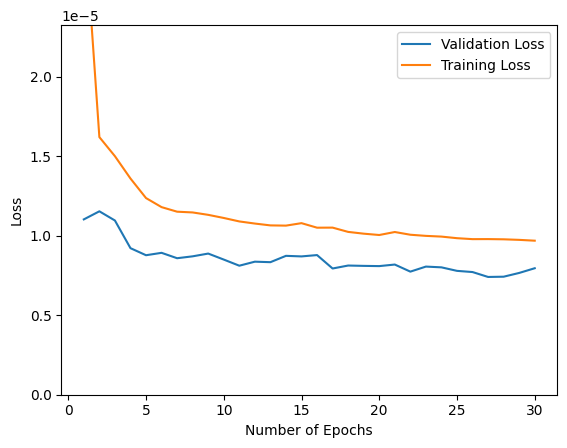

In [25]:
import statistics
x = np.linspace(1, num_epochs, num_epochs)

fig, ax = matplotlib.pyplot.subplots()
ax.plot(x, valid_loss_epoch, label='Validation Loss')
ax.plot(x, train_loss_epoch, label='Training Loss' )
#matplotlib.pyplot.xlim([5, 25])
matplotlib.pyplot.ylim([0, statistics.mean(train_loss_epoch)*2])
matplotlib.pyplot.xlabel('Number of Epochs')
matplotlib.pyplot.ylabel('Loss')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

In [26]:
# Evaluating Model Performance with Test Data

model.eval() # Model to evaluation mode

test_loss = 0.0
test_correct = 0
test_total = 0
loss_list_test = []

# Loop for testing
for inputs, labels in test_dataloader:
    #Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    test_loss += loss.item() * inputs.size(1)
    loss_list_test.append(loss)
    
    _, labels = torch.min(labels, 1)
    _, predicts = torch.min(outputs.data, 1)
    predicts = predicts.unsqueeze(1)
    test_total += labels.size(0)
    test_correct += (predicts == labels).float().mean()

accuracy = (test_correct / test_total)*100
test_loss /= len(test_dataloader.dataset)
print(f' Mean Loss of Function: {test_loss}, Accuracy: {accuracy}')
print(labels.shape, outputs.shape)

 Mean Loss of Function: 5.893404595553875e-06, Accuracy: 1.0
torch.Size([100, 5500]) torch.Size([100, 1, 5500])


### Testing best model

## Model Prediction

In [27]:
def get_predictions(model, test_dataloader):
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize a list to store the predictions
    predictions_list = []

    # Use torch.no_grad() context to disable gradient calculation, which speeds up the process
    with torch.no_grad():
        # Iterate over the test dataloader
        for inputs, _ in test_dataloader:
            # Get the model predictions for the given inputs
            predictions = model(inputs)
            
            # Convert the predictions tensor to a numpy array
            predictions_numpy = predictions.cpu().numpy()
            
            # Append the predictions numpy array to the list
            predictions_list.append(predictions_numpy)

    # Concatenate all predictions numpy arrays along the first axis
    predictions_concatenated = np.concatenate(predictions_list, axis=0)
    
    # Reshape the concatenated predictions to have 2 dimensions
    predictions_reshaped = predictions_concatenated.reshape(-1, predictions_concatenated.shape[-1])
    
    # Convert the reshaped predictions to a pandas DataFrame
    pred_df = pd.DataFrame(predictions_reshaped)

    # Return the predictions DataFrame
    return pred_df


In [28]:
# Get the predictions DataFrame for the given model and test dataloader

predictions_df = get_predictions(model, test_dataloader)

### Using model to generate high resolution spectra

In [33]:
def generate_high_res_plot(model, file_path):
    """
    Generate a plot comparing original and high-resolution spectra
    from a given CSV file using a pre-trained model.

    Args:
        model: A pre-trained model for predicting high-resolution spectra.
        file_path: A string, path to the CSV file containing the data.
        input_column_name: A string, name of the column with the original spectra data.
        input_ppm_column_name: A string, name of the column with the original ppm values.
        output_ppm_column_name: A string, name of the column with the high-resolution ppm values.

    Returns:
        A matplotlib figure containing the comparison plot.
    """

    # Load CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Process the input data
    input_data = df['60MHz_intensity'].to_numpy()
    input_data = torch.Tensor(input_data).unsqueeze(0).unsqueeze(1).to(device)

    # Make predictions using the model
    predictions = model(input_data)
    predictions_numpy = predictions.detach().cpu().numpy().reshape(-1)

    # Plot the data
    x = np.linspace(-.5, 10.5, 5500)

    fig, ax = matplotlib.pyplot.subplots()
    ax.plot(df['60MHz_ppm'], df['60MHz_intensity'] + 1.0, label='60 MHz')  # 2nd plot shifted up by 1.0
    ax.plot(df['400MHz_ppm'], df['400MHz_intensity'] + 0.5, label='400MHz')  # 3rd plot shifted up by 0.5
    ax.plot(x, predictions_numpy, label='Prediction')  # 1st plot is at the original level

    ax.legend()
    ax.set_xlabel('ppm')
    ax.set_ylabel('Intensity')
    ax.set_title('Comparison of Original and High Resolution Spectra')
    matplotlib.pyplot.ylim([-0.1, 0.5 + 1.0])  # Adjusted upper y limit to account for the shift
    return fig










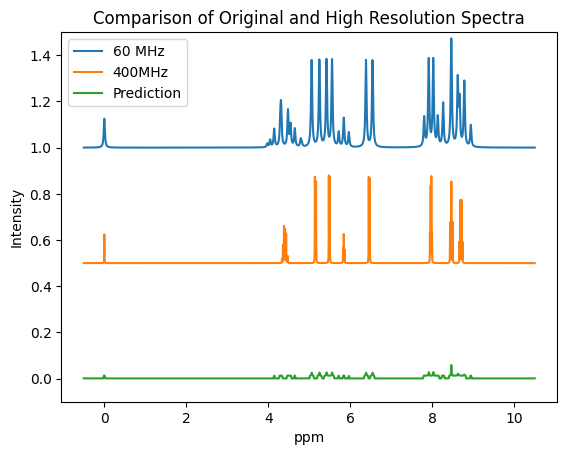

In [34]:
file_path = '/content/drive/My Drive/spectral_data/test400/400MHz/spectral_data_09_00000.csv'


fig = generate_high_res_plot(model, file_path)
matplotlib.pyplot.show()
